In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df2 = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df=df2.copy()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns=df.columns.str.lower()

In [7]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

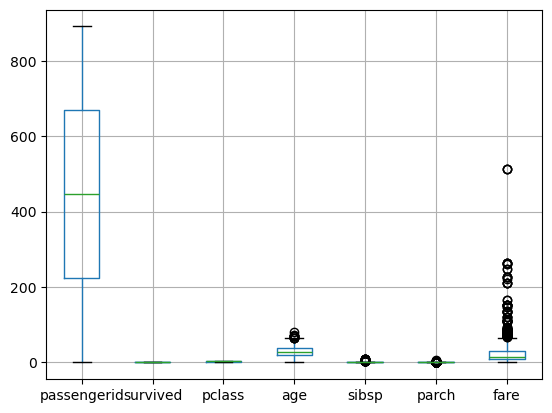

In [10]:
df.boxplot()

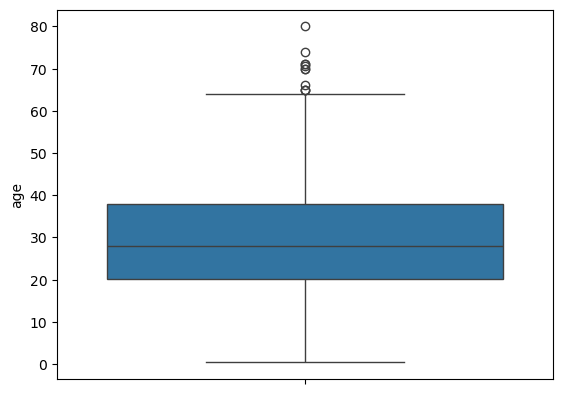

In [11]:
sns.boxplot(df["age"])
plt.show()

In [12]:
df["age"].median()

28.0

In [13]:
df["age"].mode()

0    24.0
Name: age, dtype: float64

In [14]:
df["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [15]:
df["age"].fillna(df["age"].median(),inplace=True)

In [16]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [17]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

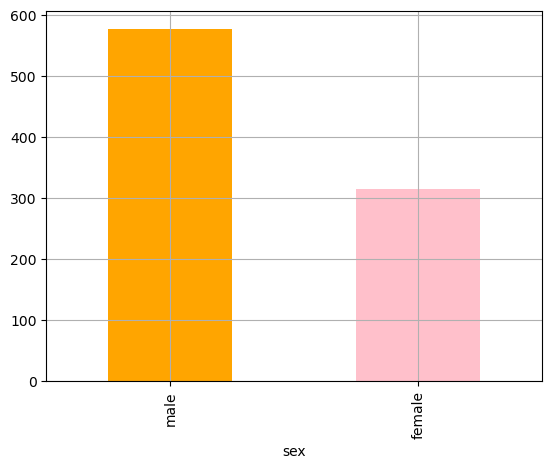

In [18]:
df["sex"].value_counts().plot.bar(color=["orange","pink"]).grid()
plt.show()

In [19]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

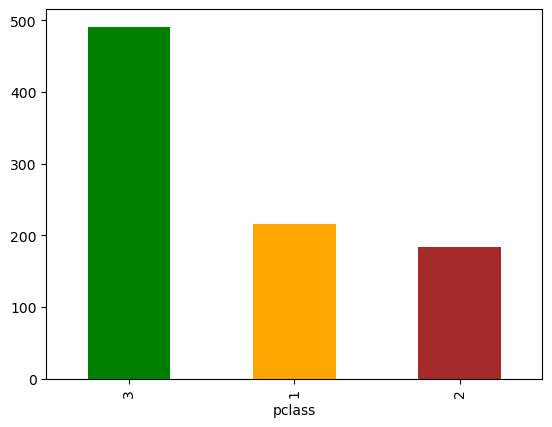

In [20]:
df["pclass"].value_counts().plot.bar(color=["g","orange","brown"])
plt.show()

In [21]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

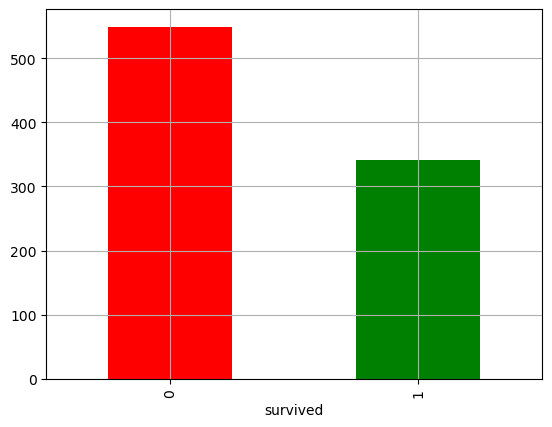

In [22]:
df["survived"].value_counts().plot.bar(color=["r","g"]).grid()
plt.show()

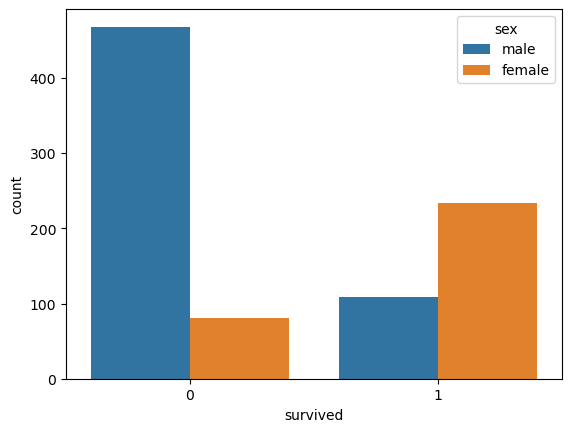

In [23]:
sns.countplot(x="survived",data=df,hue="sex")
plt.show()

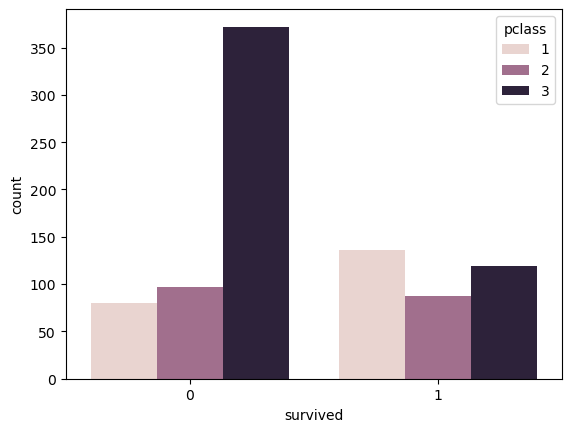

In [24]:
sns.countplot(x="survived",data=df,hue="pclass")
plt.show()

In [25]:
df.drop(["cabin","name","ticket","passengerid"],axis=1,inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [28]:
df["sex"]=preprocessing.LabelEncoder().fit_transform(df["sex"])
df2=pd.get_dummies(df["embarked"]).astype(np.int64)
df.drop("embarked",axis=1,inplace=True)

In [29]:
df2.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
df2.drop("S",axis=1,inplace=True)

In [31]:
df=pd.concat([df,df2],axis=1)

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   C         889 non-null    int64  
 8   Q         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


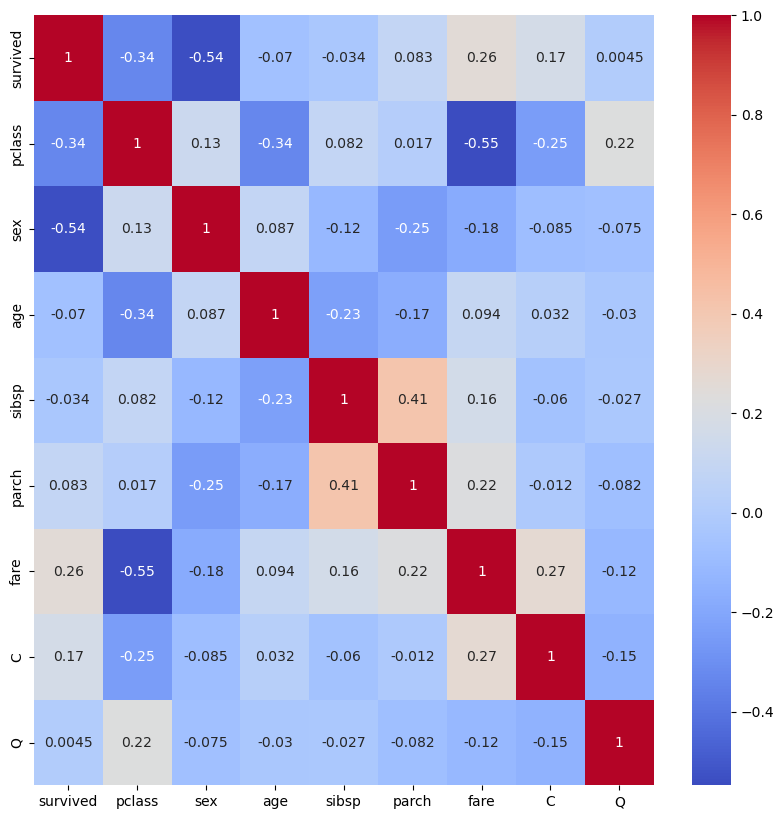

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,vmax=True,cmap="coolwarm")
plt.show()

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,0,0


In [36]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [37]:
skf=StratifiedKFold(n_splits=5)

In [38]:
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [39]:
model=LogisticRegression()

In [40]:
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred=model.predict(X_test)

In [42]:
df2=pd.DataFrame({"actual":y_test,"predict":y_pred})

In [43]:
df2.head()

,actual,predict
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


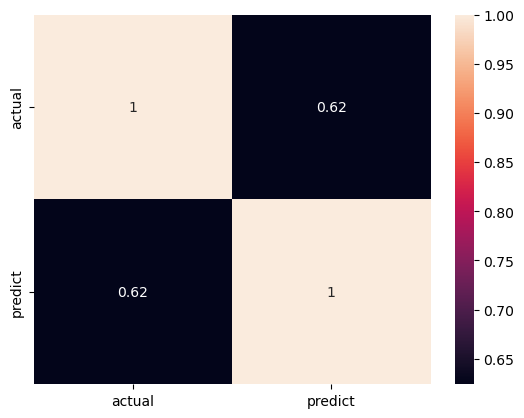

In [44]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [45]:
confusion_matrix(y_test,y_pred)

array([[99, 10],
       [21, 47]])

In [46]:
accuracy_score(y_pred,y_test)

0.8248587570621468

In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       120
           1       0.69      0.82      0.75        57

    accuracy                           0.82       177
   macro avg       0.80      0.82      0.81       177
weighted avg       0.84      0.82      0.83       177

